# 🏛️ **The Shawshank Prediction**: An Ode to Data, Despair, and a Dash of Machine Learning

> *Narrated by Morgan Freeman, probably. But also, not really.*

**Citations**:
Anshika. HR Analytics Dataset. Kaggle, 2021, https://www.kaggle.com/datasets/anshika2301/hr-analytics-dataset/data. Accessed on Nov 13th 2024.

Disclaimer: This dataset was accessed and used solely for educational purposes

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/AkhilByteWrangler/XplainHR-Attrition/blob/main/Attrition_Prediction_and_Explainability.ipynb)

---

## **🌅 Act 1: Andy Dufresne and the Spreadsheet of Despair**

Corporateville. A prison of fluorescent lights, stale coffee, and that faint scent of broken dreams wafting through the air vents. Into this soulless abyss walked **Andy Dufresne**. He was a man of quiet resolve, an accountant by trade, and now a prisoner of HR, locked away with only a desk, a deadline, and a *terrifyingly large spreadsheet*.

“Andy”, the HR warden said, sliding a stack of employee data his way, “we need you to figure out why everyone’s leaving.”

Most would’ve laughed, maybe cried a little. But Andy… Andy just looked at the data, like a condemned man staring down his fate. He nodded. *“I’ll do it.”*

> *“I wish I could tell you Andy took one look at that spreadsheet and walked away. I wish I could say he just went back to doing expense reports and calling it a day. But this is Andy Dufresne we’re talking about. He doesn’t take the easy way out.”*

(You know the kind, the type who thinks they can *“disrupt”* an entire industry with one line of code. Ah, tech bros, we love your optimism.)

## **🔧 Act 2: Tools in the Yard – When Pandas and SHAP Are All You’ve Got**

Andy knew that to tackle this mess, he’d need some heavy-duty tools. But this wasn’t any ordinary toolkit. No, this was the machine-learning starter pack: **pandas** to wrangle data, **scikit-learn** for the nitty-gritty, and **SHAP**—the magic decoder ring of explanations.

(And yes, he downloaded it all with `pip install`, while whispering a prayer to the gods of Stack Overflow and ChatGPT.)

> *“You know, they send you here for life. And life means a lot of libraries that make no sense to anyone outside of this prison. But Andy? He just quietly installed them all, one by one. And that’s how I knew he was serious.”*

In [1]:
!pip --quiet install pandas shap scikit-learn matplotlib

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

---

## 🗂️ **Act 3: The Data – A Dumpster Fire of Columns**

The data wasn’t just bad. It was **Corporateville-level bad**. There were columns that meant nothing, rows that seemed to scream, “Why am I here?” Employee IDs? Worthless. A column saying everyone’s over 18? *Groundbreaking insight, right there.*

So, Andy did what he had to. He rolled up his sleeves and cleaned that data, dropping columns like they were hot potatoes at an AI ethics debate.

> *“Most people don’t understand the quiet hell of data cleaning. But Andy… he knew that hell. And he knew he had to go through it, column by column, if he ever wanted to see daylight again.”*

(Side note for my data science folks: there’s a special place in heaven for anyone who’s had to explain why `EmployeeCount` set to 1 for everyone isn’t actually *adding value*.)

In [3]:
# Load the HR Analytics dataset from GitHub
url = "https://raw.githubusercontent.com/AkhilByteWrangler/XplainHR-Attrition/main/HR_Analytics.csv"
df = pd.read_csv(url)

# Display the first few rows to understand the structure of the data
print("Dataset preview:")
df.head()

Dataset preview:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [4]:
# Print the column names of the DataFrame
print("Column names in the dataset:")
print(df.columns)

Column names in the dataset:
Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [5]:
# Drop columns that are not useful for predicting attrition
df = df.drop(columns=[
    'EmpID',           # Unique identifier for employees, not predictive
    'EmployeeCount',
    'EmployeeNumber',  # Another unique identifier
    'Over18',
    'StandardHours'
])

In [6]:
df

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,3,...,3,3,0,0,2,3,0,0,0,0.0
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,4,...,3,1,0,0,2,3,0,0,0,0.0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,2,...,3,4,0,0,3,3,0,0,0,0.0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,2,...,3,4,0,0,2,3,0,0,0,0.0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,3,...,3,4,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,3,4,0,33,5,1,29,8,11,10.0
1476,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,3,...,3,4,0,22,5,4,18,13,13,11.0
1477,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,...,3,4,0,10,1,3,2,2,2,2.0
1478,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,2,...,3,2,1,12,3,3,11,7,1,9.0


---

## **🔢 Act 4: Yes and No? Nope. We’re Talking Ones and Zeroes Here**

At the heart of this mess was the “Attrition” column. It was supposed to tell Andy who quit and who stayed, but it was full of useless words like “Yes” and “No.” Machines don’t do “Yes” and “No.” They do **1s and 0s**.

So Andy got to work, painstakingly translating each “Yes” into a 1 and each “No” into a 0. The people of Corporateville were now reduced to binary digits, cold and detached, just the way the machine likes it.

> *“They institutionalized him. Made him speak their language, stripped him of every last bit of humanity. By the end, all that was left was a 1 or a 0. And Corporateville… well, Corporateville was just fine with that.”*

(Just like the tech bro who thinks binary is the only language that matters. Human experience? Meh, who needs it.)

In [7]:
# Convert 'Attrition' column from Yes/No to binary (1 for Yes, 0 for No)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

---

## **🎓 Act 5: Andy’s Training Day – When Machine Learning Is Just Another Gri**nd

Once the data was prepped, Andy trained himself. Day in and day out, he split the data, trained on one half, and tested on the other. Over and over, until he could see the patterns, the silent indicators of attrition.

> *“They say a man can get used to anything. Even a prison of his own making. And Andy? He found solace in the patterns, in the quiet hum of calculations. Somewhere in that data, he found something that looked an awful lot like purpose.”*

(This is the part where a tech bro would say something like, *“Bro, machine learning changed my life.”* But Andy wasn’t here to brag. He just kept his head down and kept grinding.)

In [8]:
# Encode categorical variables with one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

# Convert boolean columns to integers in both X_train and X_test
for col in X.select_dtypes(include=['bool']).columns:
    X[col] = X[col].astype(int)


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Accuracy: 86.15%


---

## **🌲 Act 6: Andy the Random Forest – A Man of Many Branches**

When he was ready, Andy became more than just a man. He was **Andy the Random Forest**, a complex web of decisions, each one branching into the next. He was pathways upon pathways, a million choices that all led to one final prediction.

To the HR warden, it might’ve looked like magic. But to Andy, it was just numbers, probabilities, paths he’d walked a thousand times before.

> *“They say no one truly understands a random forest, least of all the one who created it. And Andy… well, Andy just shook his head, knowing his forest would keep growing, long after he was gone.”*

(Yes, that’s right, folks. The Random Forest algorithm—a beautiful, complex mess. Just like tech bros who think they can “explain” it after watching one Indian YouTube tutorial.)

In [ ]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

---

## **📈 Act 7: The Test – Will Corporateville Believe Him?**

The day finally came. Andy ran his predictions and braced himself for the result. **86.15% accuracy**. Not perfect, but enough to get the HR warden’s attention. Enough to make them pause, for just a moment.

But Andy knew that 86.15% wasn’t going to cut it on its own. Not in Corporateville. Not when they wanted **answers**.

> *“Most people would see that number and pat themselves on the back. But Andy knew better. Because 86.15% doesn’t explain a damn thing. And in Corporateville, if you can’t explain yourself, you’re as good as gone.”*

(Let’s be real—any tech bro would’ve posted that score on LinkedIn with #DataScienceLife. But Andy? Andy wasn’t here for clout.)

In [ ]:
# Check model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

---

## **🌞 Act 8: The SHAP Redemption – Andy’s Last Stand in the Prison Yard**

Andy Dufresne, standing alone in the prison yard of Corporateville, clutched his last hope tightly in his hand: a **SHAP summary plot**. This wasn’t just some colorful graph. No, this was Andy’s masterpiece, the culmination of years of work, the key to his escape from this gray, soul-sucking prison. If he could just make the warden and the HR guards understand, he might finally taste freedom.

> *“I wish I could tell you that the HR warden and the guards understood what Andy was trying to show them. I wish I could say they looked at that SHAP plot and finally saw the light. But you know, Corporateville ain’t exactly the place for fairy tales.”*

Andy took a deep breath and unfurled the SHAP plot before the crowd. Each bar on that chart was a window into the dark heart of Corporateville. It laid out, clear as day, why people were ready to run for the hills. But let’s break it down, shall we? Here’s how Andy’s SHAP summary plot explained the misery in Corporateville:

1. **OverTime_Yes** – The top dog, the #1 reason folks were breaking out. Turns out, Corporateville was piling on the overtime, squeezing every last drop from its people. SHAP showed that *overtime* was like the heavy shackles weighing everyone down.

2. **JobLevel** – Climbing the ladder wasn’t all it was cracked up to be. The higher the job level, the heavier the burden. SHAP pointed out that moving up in Corporateville was like walking up to the gallows.

3. **YearsAtCompany** – The longer they kept you in Corporateville, the more you wanted out. SHAP revealed the grim truth: *time served* was a one-way ticket to burnout.

4. **StockOptionLevel** – The promise of stock options wasn’t enough to keep the prisoners content. SHAP laid it out plain and simple: “You can’t eat stock options, folks.”

5. **Age** – As the years went by, Corporateville felt more like a trap. The older you got, the more desperate you became to escape.

6. **YearsWithCurrManager** – Spending years with the same boss was like solitary confinement. SHAP knew that being stuck with the same manager was enough to drive anyone mad.

> *“It was like SHAP was Andy’s flashlight in the darkness, illuminating all the tiny cracks in the walls of Corporateville. One factor at a time.”*

---

### **The Math Behind the Magic – What is SHAP, Really?**

Now, let’s get real for a second. SHAP isn’t magic. It’s *math*. In fact, SHAP stands for **SHapley Additive exPlanations**, and it’s based on a concept from game theory called **Shapley values**. Yeah, that’s right, game theory—the same field that gave us poker strategies and tech bros who think they’re geniuses because they can count cards.

Here’s the gist: Shapley values are a way to fairly divvy up “credit” among different players (or features, in this case) based on how much each one contributed to the outcome. Imagine you’re splitting a prize among friends after winning a game, and each friend contributed a different amount to the win. Shapley values figure out exactly how much each friend “deserves” based on their contributions.

For Andy’s model, SHAP calculated how much each feature—like **overtime** or **job level**—was “responsible” for the final prediction. It’s like figuring out who pulled the most weight in a prison break.

The actual Shapley value $\phi_i$ for a feature $i$ is given by this beautiful monster:

$$
\phi_i = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|! \, (|N| - |S| - 1)!}{|N|!} \left( f(S \cup \{i\}) - f(S) \right)
$$

where:
- $N$ is the set of all features (all the possible “players”),
- $S$ is a subset of $N$ that doesn’t include $i$,
- $f(S)$ is the prediction when only the features in $S$ are considered,
- $f(S \cup \{i\}) - f(S)$ is the extra “credit” feature $i$ deserves when added to subset $S$.

In simple terms, this formula calculates the *marginal contribution* of each feature to the prediction by averaging across all possible feature combinations. And yes, it’s as exhausting as it sounds. The sheer number of combinations explodes with each additional feature, making it computationally impossible to calculate exactly for complex models.

But here’s the twist: the SHAP library takes a few *shortcuts*. It’s an **approximation** of the exact Shapley values, using sampling and other tricks to get a close-enough answer without melting your CPU. So, SHAP itself is really just a *best guess*, an estimate of what’s driving Andy’s model.

> *“In other words, SHAP is the machine learning version of ‘close enough’—and sometimes, close enough is all you get.”*

(And yeah, you know some tech bro is out there saying, *“Dude, Shapley values are life. It’s like splitting the check after dinner, but, you know… mathematical.”*)


 99%|===================| 588/592 [00:18<00:00]       

Generating SHAP summary plot...


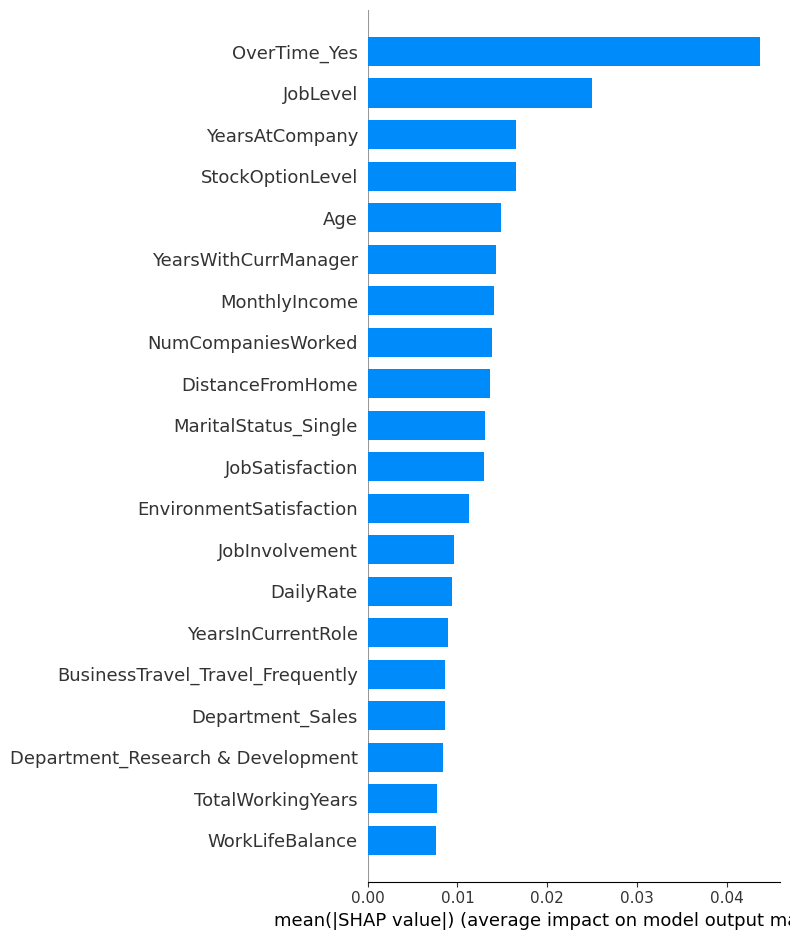

In [10]:
# Initialize the SHAP explainer with the converted data
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

print("Generating SHAP summary plot...")
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")

## **🌄 Act 9: The Great Escape – Andy’s Tunnel to Freedom**

So there Andy stood, holding his SHAP plot like it was a jail-breaking blueprint. He’d shown the HR warden and his guards exactly why people were bolting out of Corporateville. But did they listen? Of course not. They just stared, blinking at that SHAP plot, scratching their heads over terms like *OverTime_Yes* and *JobLevel*.

And while they were busy squinting at that chart, trying to understand what SHAP was saying, Andy made his move. Late one rainy night, he climbed down into the data tunnels beneath Corporateville, clutching that SHAP plot under his coat. He crawled through 500 yards of CSV files and JSON logs, crawled and scraped and dug his way out.

> *“Andy Dufresne – the man who escaped Corporateville armed with nothing but a SHAP plot and a dream.”*

He came out the other side, covered in data grit and SQL queries, but free. Free to start a new life, away from the shackles of overtime hours and endless job levels. And he didn’t just escape—oh, no. He left something behind. He left that SHAP plot on the warden’s desk as a final message, a roadmap for anyone else who wanted to follow him to freedom, and to get the warden in jail.

---

## 🌅 Epilogue – Red’s Redemption and the Road to Riches

Now, you might be wondering how *I*, Red, found my own way out. Well, it was that SHAP plot Andy left behind. Turns out, Corporateville wasn’t about to change its ways. The warden didn’t care that overtime was grinding people down, or that long tenures made them feel trapped. But when I saw that SHAP plot, I knew what Andy had done.

I used that knowledge like a map to the promised land. I followed Andy’s example, slipped out of Corporateville, and started consulting for other prisons—I mean, corporations. Everywhere I went, I showed them the SHAP gospel: *“Here’s why people are leaving, and here’s what you can do about it.”*

> *“Some birds aren’t meant to be caged. And thanks to SHAP, I wasn’t one of them.”*

That SHAP plot didn’t just set us free—it made us rich. Because there’s always another Corporateville out there, and they’re always ready to pay for the secrets SHAP can tell them.

> **Final Thought:** *"In the end, Andy showed me the way. And I followed him – all the way to freedom, and all the way to the riches waiting on the other side of the SHAP plot."*

---